In [1]:
cd ../../AY121/lab3

/Users/lfinkbeiner/Documents/GitHub/AY121/lab3


In [2]:
%matplotlib notebook
%run synthesis3

In [3]:
cd lukas

/Users/lfinkbeiner/Documents/GitHub/AY121/lab3/lukas


In [4]:
sun_hour = load_saves('../data/last_edition/sun_63.73_minutes.npz')

In [5]:
cd ..

/Users/lfinkbeiner/Documents/GitHub/AY121/lab3


In [6]:
v = sun_hour['data'][0]
t = sun_hour['data'][1]
print(len(v))

3824


<IPython.core.display.Javascript object>


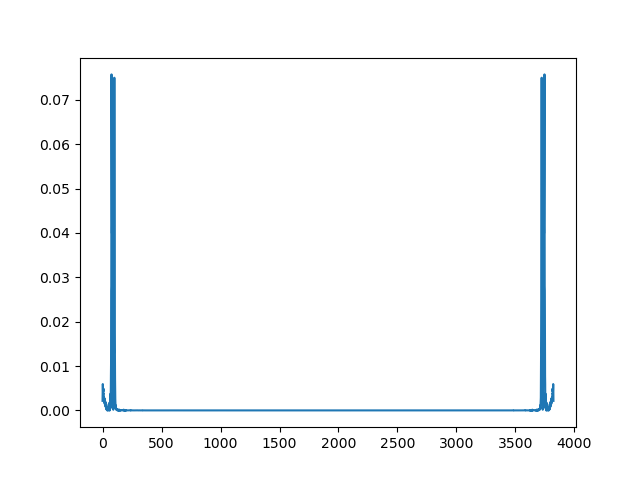

In [7]:
# We sample at 1 Hz a number of points equal to the length of the data arrays
x = freq_range(1, len(v))
F = np.fft.fft(v)
P = np.abs(F) ** 2
plt.plot(P[1:])
# be careful; some of these plots have to be re-run for them to appear properly

[2.68280076e-10]


<IPython.core.display.Javascript object>


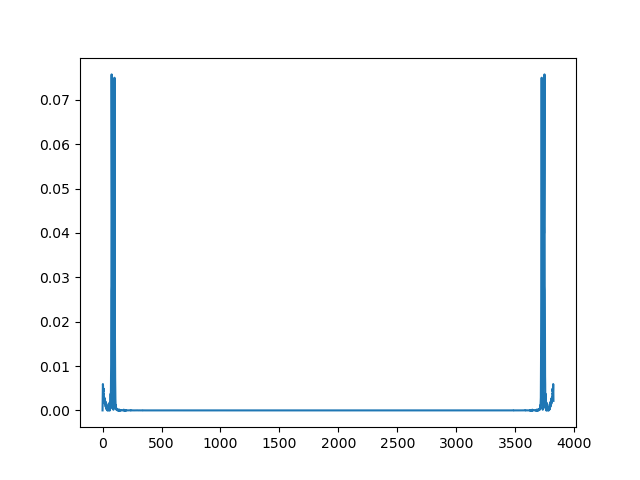

In [8]:
filtered = np.array([min(P[1:])])
print(filtered)
filtered = np.append(filtered, P[1:], axis=0)
#filtered
plt.plot(filtered)
# the initial discontinuity looks strange but is appropriate for a "rude" filter

<IPython.core.display.Javascript object>


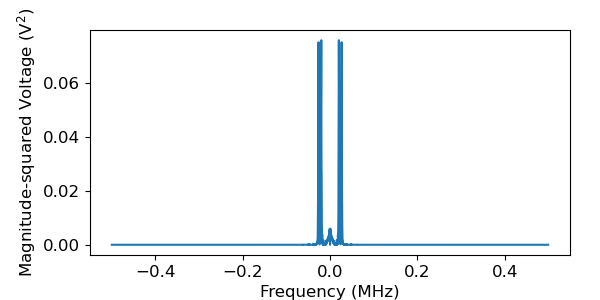

In [9]:
#print(P[0])
#fourier_skeleton(x, P, rude_filter=True)
pp_skeleton(x, filtered)

In [16]:
def fringe_plot(v):
    fig = plt.figure(figsize=(6,3))
    plt.subplots_adjust(left=.15, bottom=.15, right=.95, top=.9)
    ax = fig.add_subplot(111)

    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12)
    
    L = len(v)
    x = np.linspace(300, L * 600 - 300, L)
    
    ax.plot(x, np.multiply(v, 1000))
    
    plt.xlabel('Elapsed Time [s]', fontsize=12)
    plt.ylabel('Fringe Frequency [mHz]', fontsize=12)
    
    plt.show()

<IPython.core.display.Javascript object>


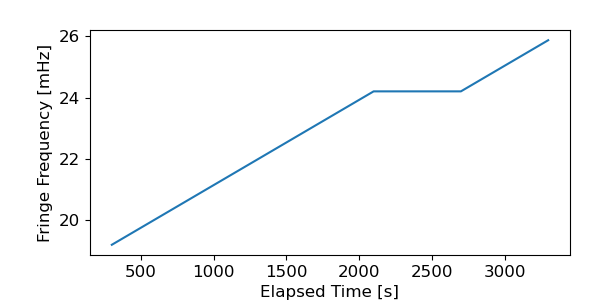

In [17]:
sun_fringes = collect_fringes(v)
fringe_plot(sun_fringes)

In [11]:
#ugradio.coord.sunpos?
# We want to model the drift in fringe frequency with a baseline, then implement chisq?
    # but then, what would be the difference between the diameter and distance calculations?

#step 1: 

In [63]:
erst_t = ugradio.timing.julian_date(t[0])
erst_rd = ugradio.coord.sunpos(erst_t)
erst_aa = ugradio.coord.get_altaz(erst_rd[0], erst_rd[1], jd=erst_t)
letzt_t = ugradio.timing.julian_date(t[len(t) - 1])
letzt_rd = ugradio.coord.sunpos(letzt_t)
letzt_aa = ugradio.coord.get_altaz(letzt_rd[0], letzt_rd[1], jd=letzt_t)
print('First datum, jd:', erst_t, ugradio.timing.local_time(t[0]))
print('Pointing at', erst_rd)
print('For the dish:', erst_aa)
print('Final datum, jd:', letzt_t, ugradio.timing.local_time(t[len(t) - 1]))
print('Pointing at', letzt_rd)
print('For the dish:', letzt_aa)
# We need fifteen degrees per hour

First datum, jd: 2458921.168973195 Thu Mar 12 09:03:19 2020
Pointing at (352.8956941213158, -3.0689016611913718)
For the dish: (48.78470093144381, 170.8333119175011)
Final datum, jd: 2458921.2132208054 Thu Mar 12 10:07:02 2020
Pointing at (352.9363023157842, -3.0514830869036325)
For the dish: (48.79688765720007, 170.76918753026362)


In [13]:
def hour_angle(time):
    '''
    We expect @time is a Unix time
    We assume all terrestrial coordinates correspond to NCH
    '''
    jd = ugradio.timing.julian_date(t)
    pos = ugradio.coord.sunpos(t)
    ra = pos[0]
    hour = np.floor(ra)
    minute = np.floor((ra - hour) * 60)
    second = np.around(((ra - hour) * 60 - minute) * 60, 2)
    
def ra_dec(time, sun=True):
    jd = ugradio.timing.julian_date(time)
    return ugradio.coord.sunpos(jd)

In [105]:
h_letzt = -1 - 52 / 60 - 2 / 3600
print(h_letzt)
h_erst = -2 - 56 / 60 - 41 / 3600
print(h_erst)
ha_erst = h_erst * np.pi / 12
print(ha_erst)
ha_letzt = h_letzt * np.pi / 12
print(ha_letzt)

-1.8672222222222223
-2.9447222222222225
-0.7709264750163287
-0.48883763466274516


In [14]:
# these values are computationally expensive
rd_Sh = np.array([ra_dec(e) for e in t])

<IPython.core.display.Javascript object>


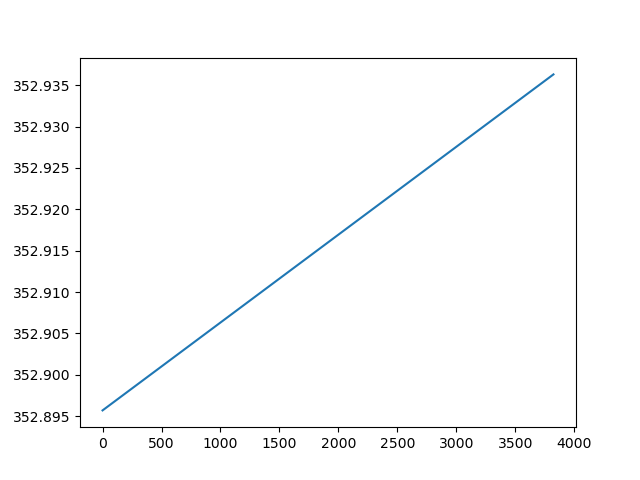

In [15]:
# right ascension plot, Sun hour
ra = rd_Sh[:, 0]
plt.plot(t - min(t), rd_Sh[:, 0])

<IPython.core.display.Javascript object>


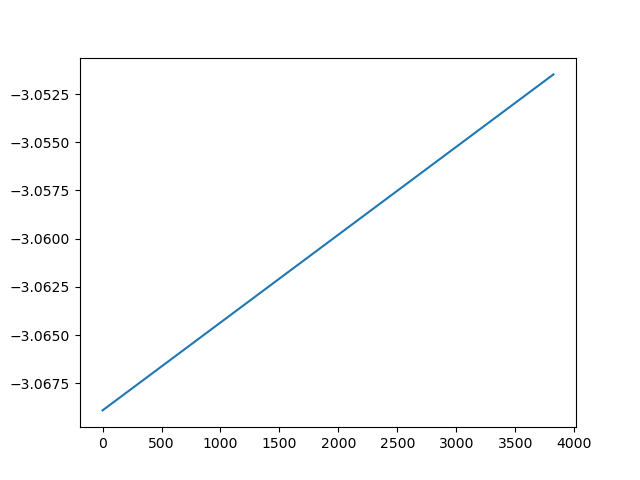

In [18]:
# declination plot, Sun hour
dec = rd_Sh[:, 1]
plt.plot(t - min(t), dec)

In [19]:
ra = 198.924444
hour = np.floor(ra)
minute = np.floor((ra - hour) * 60)
second = np.around(((ra - hour) * 60 - minute) * 60, 2)
print(hour, minute, second)

198.0 55.0 28.0


In [20]:
i = 0
print(t[i])
print(ugradio.timing.local_time(t[i]))
print(ugradio.timing.julian_date(t[i]))
print(ra_dec(t[i]), True)

1584028999.2840478
Thu Mar 12 09:03:19 2020
2458921.168973195
(352.8956941213158, -3.0689016611913718) True


In [109]:
time_windows = [i * 600 + 300 for i in range(0, len(sun_fringes))]

ha_span = np.linspace(ha_erst, ha_letzt, len(t))
#ra_rad = np.radians(rd_Sh[:, 0])
#ra_rad = np.radians(180)
dec_rad = np.radians(rd_Sh[:, 1])
trig_term = np.multiply(np.cos(ha_span), np.cos(dec_rad))
#trig_term = np.multiply(np.cos(ra_rad), np.cos(dec_rad))
#trig_term = np.cos(dec_rad)

<IPython.core.display.Javascript object>


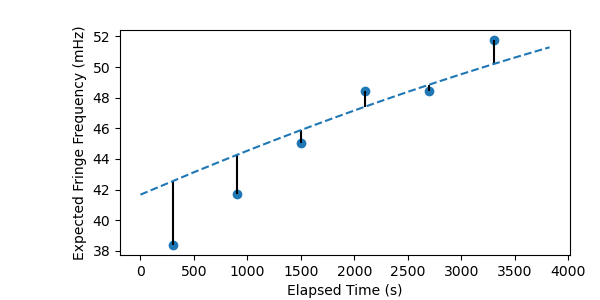

In [142]:
fig = plt.figure(figsize=(6, 3))
plt.subplots_adjust(left=.2, bottom=.15, right=.95, top=.9)
axes = plt.gca()
plt.ylabel('Expected Fringe Frequency (mHz)')
plt.xlabel('Elapsed Time (s)')

#plt.ylim((58.094, 58.0955))
#plt.ylim((57.5, 59))
expected = np.multiply(trig_term, 1000 / 17.18873385)
plt.plot(t - min(t), expected, ls='--')
observed = np.multiply(sun_fringes, 2000)
plt.scatter(time_windows, observed)
#plt.scatter(time_windows, observed - expected[time_windows])
plt.vlines(time_windows, expected[time_windows], observed)

<IPython.core.display.Javascript object>


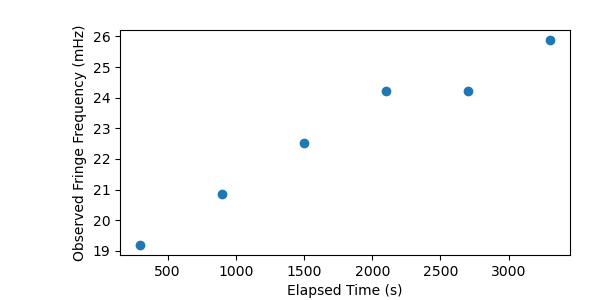

In [49]:
fig = plt.figure(figsize=(6, 3))
plt.subplots_adjust(left=.2, bottom=.15, right=.95, top=.9)
axes = plt.gca()
plt.ylabel('Observed Fringe Frequency (mHz)')
plt.xlabel('Elapsed Time (s)')
plt.scatter(time_windows, np.multiply(sun_fringes, 1000))

In [192]:
# Next step
    # represent the just-now line as a dashed line
    # add ten dots for the observed fringe frequencies
    # plot residuals... and, error bars??
sun_fringes

[0.019198664440734536,
 0.020868113522537535,
 0.022537562604340533,
 0.02420701168614353,
 0.02420701168614353,
 0.025876460767946585]

In [38]:
np.cos?